In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8,5)

In [3]:
df = pd.read_csv("/datasets/gym_churn_us.csv")
print("Dimensiones:", df.shape)
display(df.head())

Dimensiones: (4000, 14)


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [4]:
print(df.info())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [5]:
churn_means = df.groupby("Churn").mean()
display(churn_means)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


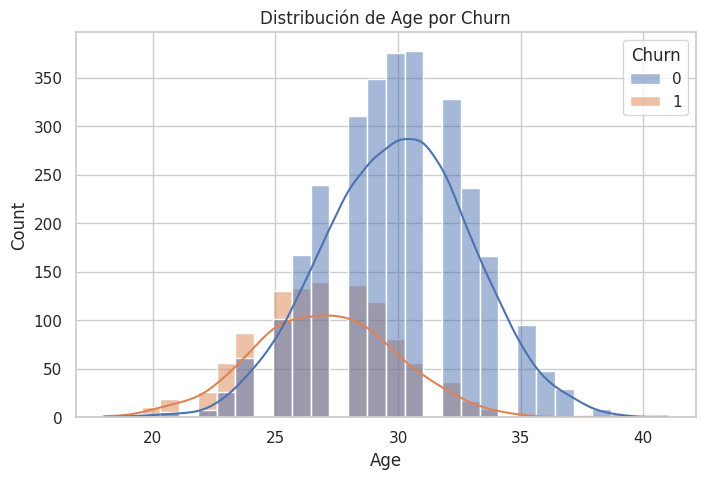

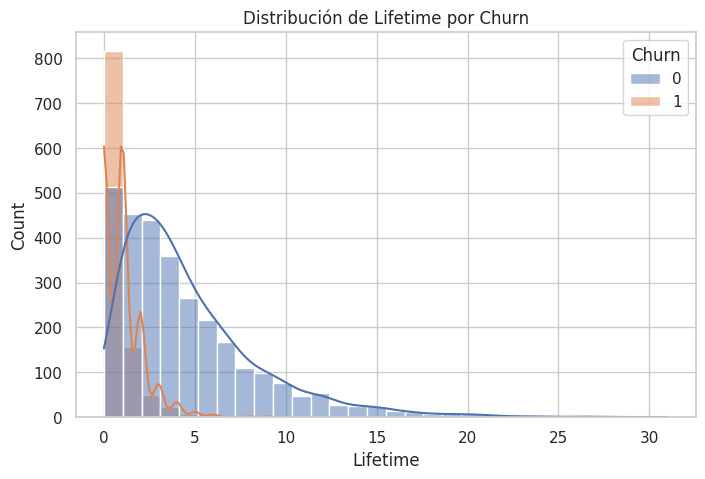

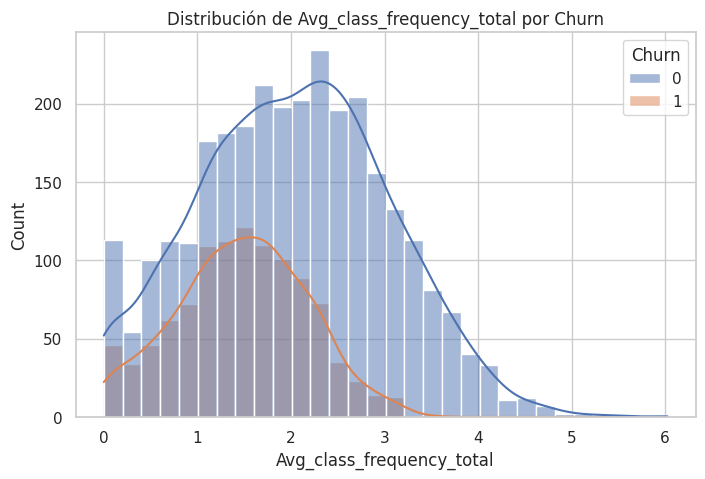

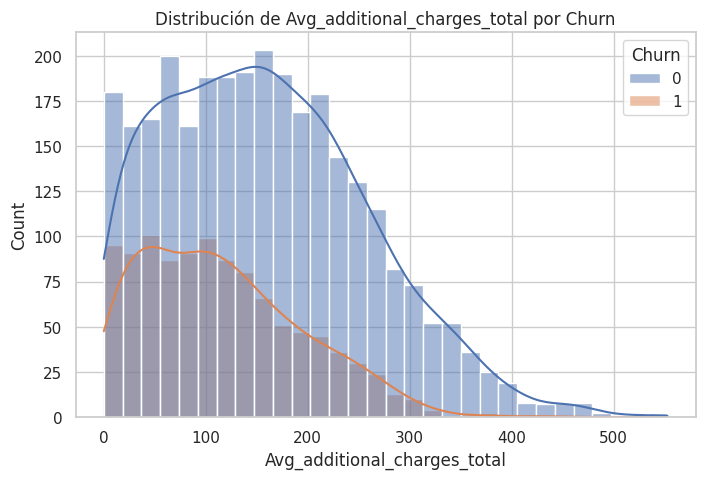

In [6]:
for col in ["Age","Lifetime","Avg_class_frequency_total","Avg_additional_charges_total"]:
    plt.figure()
    sns.histplot(data=df, x=col, hue="Churn", kde=True, bins=30)
    plt.title(f"Distribución de {col} por Churn")

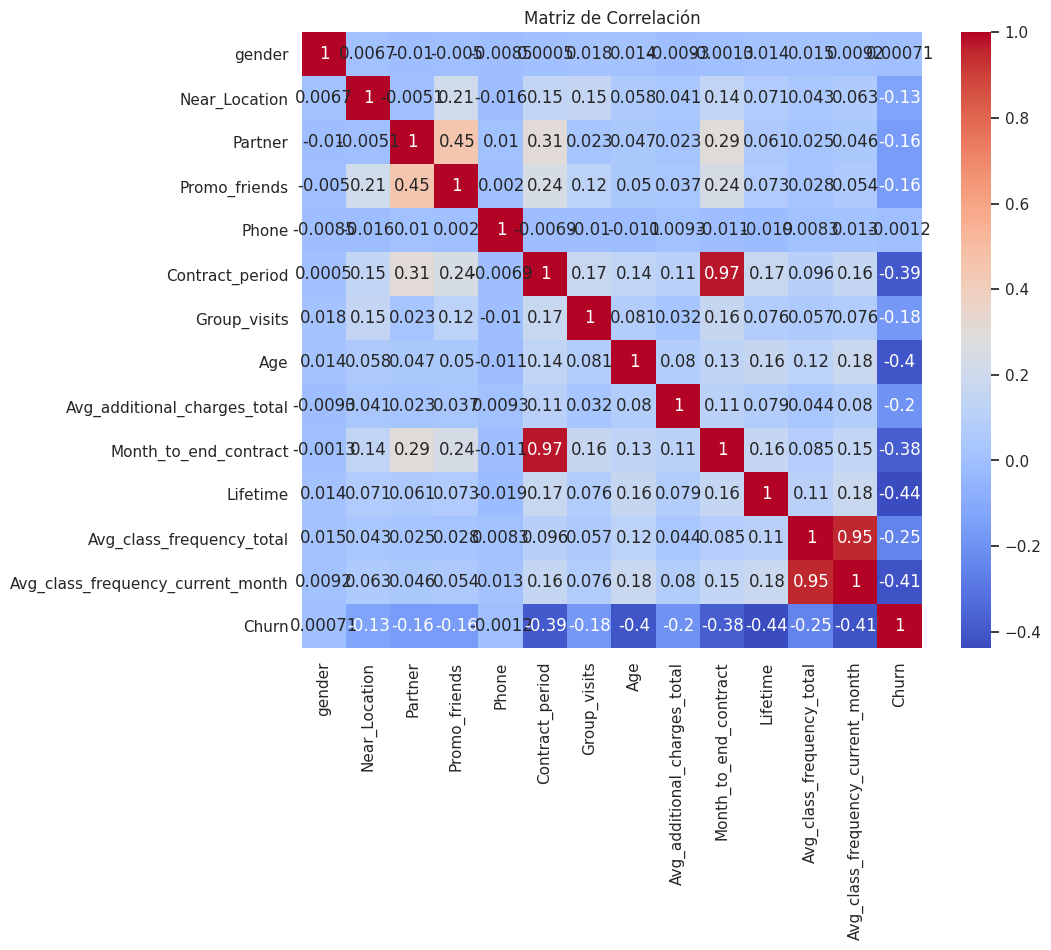

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Matriz de Correlación")
plt.show()

In [8]:
# --- 6. Modelado Predictivo
X = df.drop("Churn", axis=1)
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

# Regresión Logística
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)

# Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
# Evaluación
def eval_model(y_true, y_pred, name):
    print(f"\n--- {name} ---")
    print("Accuracy:", accuracy_score(y_true,y_pred))
    print("Precision:", precision_score(y_true,y_pred))
    print("Recall:", recall_score(y_true,y_pred))
    print("F1:", f1_score(y_true,y_pred))
    print("\nMatriz de confusión:\n", confusion_matrix(y_true,y_pred))
    print("""\nReporte clasificación:\n""", classification_report(y_true,y_pred))


eval_model(y_test, y_pred_lr, "Regresión Logística")
eval_model(y_test, y_pred_rf, "Random Forest")



--- Regresión Logística ---
Accuracy: 0.92375
Precision: 0.8756218905472637
Recall: 0.8301886792452831
F1: 0.8523002421307506

Matriz de confusión:
 [[563  25]
 [ 36 176]]

Reporte clasificación:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       588
           1       0.88      0.83      0.85       212

    accuracy                           0.92       800
   macro avg       0.91      0.89      0.90       800
weighted avg       0.92      0.92      0.92       800


--- Random Forest ---
Accuracy: 0.92375
Precision: 0.8793969849246231
Recall: 0.8254716981132075
F1: 0.8515815085158152

Matriz de confusión:
 [[564  24]
 [ 37 175]]

Reporte clasificación:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       588
           1       0.88      0.83      0.85       212

    accuracy                           0.92       800
   macro avg       0.91      0.89      0.90       800
weighted av

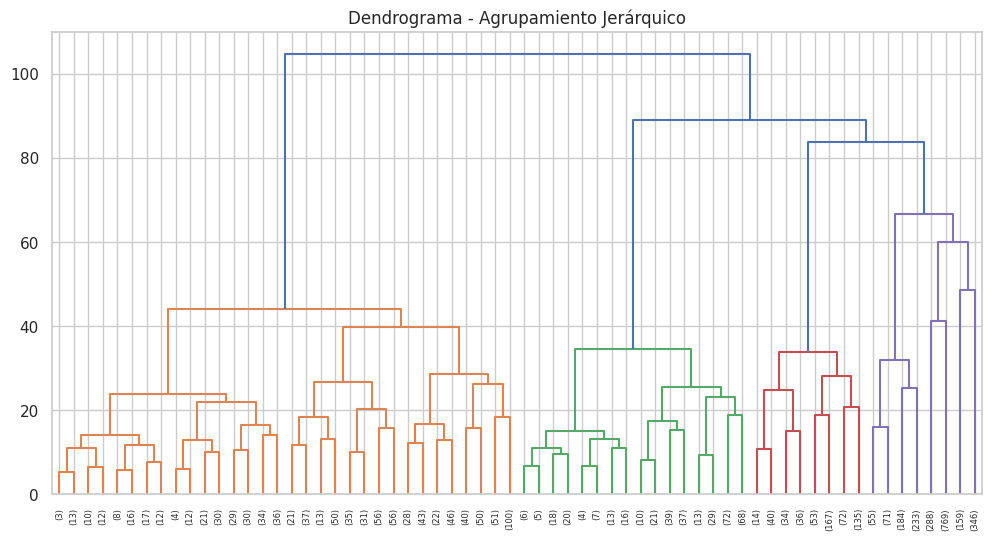

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster,,,,,,,,,,,,,,
0,0.502370,0.949447,0.829384,0.998420,1.0,3.097946,0.448657,29.104265,141.774331,2.887836,3.772512,1.770536,1.669581,0.246445
1,0.554556,0.849269,0.263217,0.052868,1.0,2.606299,0.436445,30.008999,159.774265,2.419573,4.780652,2.745505,2.733173,0.089989
2,0.499422,0.937572,0.737572,0.478613,1.0,11.854335,0.546821,29.905202,163.509804,10.812717,4.677457,2.006405,1.998179,0.021965
3,0.485738,0.718011,0.299919,0.018745,1.0,1.914425,0.276284,28.083945,129.496414,1.821516,2.195599,1.225192,0.967967,0.572942
4,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,1.723967,0.266839


cluster
0    0.246445
1    0.089989
2    0.021965
3    0.572942
4    0.266839
Name: Churn, dtype: float64

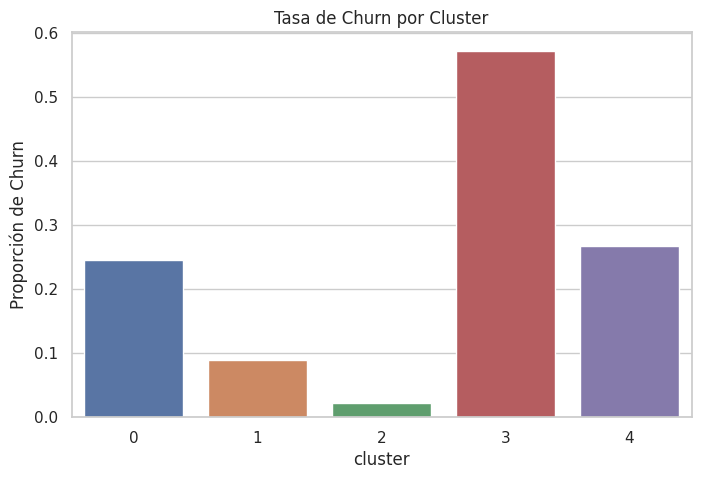

In [9]:
X_features = df.drop("Churn", axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features)

# Dendrograma
linked = linkage(X_scaled, method="ward")
plt.figure(figsize=(12,6))
dendrogram(linked, orientation="top", truncate_mode="level", p=5)
plt.title("Dendrograma - Agrupamiento Jerárquico")
plt.show()

# KMeans con n=5
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df["cluster"] = clusters

# Características por cluster
cluster_means = df.groupby("cluster").mean()
display(cluster_means)

# Distribución de churn por cluster
cluster_churn = df.groupby("cluster")["Churn"].mean()
display(cluster_churn)

plt.figure()
sns.barplot(x=cluster_churn.index, y=cluster_churn.values)
plt.title("Tasa de Churn por Cluster")
plt.ylabel("Proporción de Churn")
plt.show()

In [ ]:
# --- 8. Conclusiones
print("""
Conclusiones preliminares:
1. Los contratos más largos y la participación en clases grupales reducen la cancelación.
2. Los clientes de contratos de 1 mes y baja frecuencia de visitas son los más propensos a churn.
3. El modelo Random Forest ofrece mejor recall que la regresión logística.
4. Los clusters muestran grupos claramente más leales que otros: foco en los de alto churn.
""")